In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/classfication/diabetes.csv')
df

In [ ]:
# column importance
from sklearn.feature_selection import SelectKBest  # selects K best features
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

In [ ]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

print("X feature:", X.shape[1], 'columns')
print("y values:", y.shape[0], 'rows')

higher is better


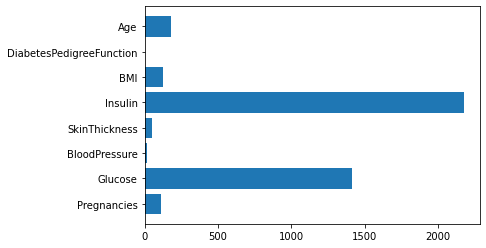

['Glucose', 'Insulin', 'BMI', 'Age']


In [54]:
Selector = SelectKBest(chi2, k=4)
Xs = Selector.fit_transform(X, y)
print("higher is better")
# visualize
bars = plt.barh(X.columns, Selector.scores_)
plt.show()
# selected columns
sel_cols_chi2 = X.columns[Selector.get_support()].tolist()
print(sel_cols_chi2)

higher is better


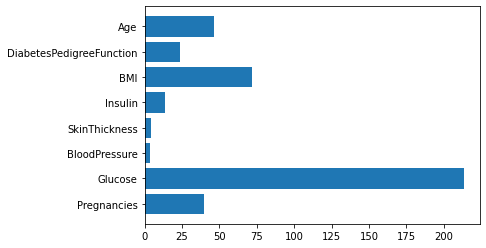

['Pregnancies', 'Glucose', 'BMI', 'Age']


In [53]:
Selector2 = SelectKBest(f_classif, k=4)
Xs = Selector2.fit_transform(X, y)
print("higher is better")
# visualize
bars = plt.barh(X.columns, Selector2.scores_)
plt.show()
# selected columns
sel_cols_fc = X.columns[Selector2.get_support()].tolist()
print(sel_cols_fc)

higher is better


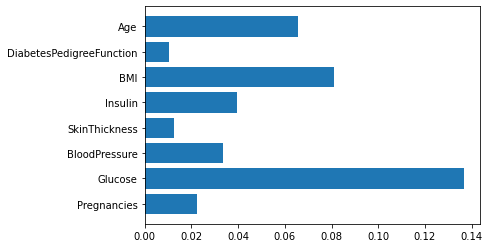

['Glucose', 'Insulin', 'BMI', 'Age']


In [52]:
Selector3 = SelectKBest(mutual_info_classif, k=4)
Xs = Selector3.fit_transform(X, y)
print("higher is better")
# visualize
bars = plt.barh(X.columns, Selector3.scores_)
plt.show()
# selected columns
sel_cols_mi = X.columns[Selector3.get_support()].tolist()
print(sel_cols_mi)

In [37]:
# rfe 
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier

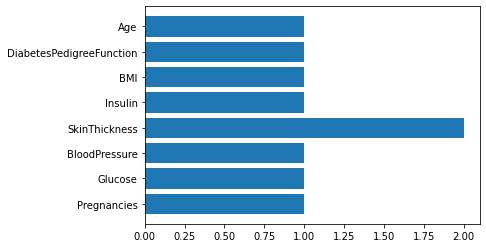

['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [51]:
clf = DecisionTreeClassifier()
rfe = RFECV(clf, min_features_to_select=2, scoring='accuracy')
rfe.fit(X, y)

# visualize
bars = plt.barh(X.columns, rfe.ranking_, )
plt.show()

# selected columns
sel_cols_rfe = X.columns[rfe.support_].tolist()
print(sel_cols_rfe)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns

              precision    recall  f1-score   support

           0       0.81      0.91      0.85       107
           1       0.71      0.51      0.59        47

    accuracy                           0.79       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.78      0.79      0.77       154



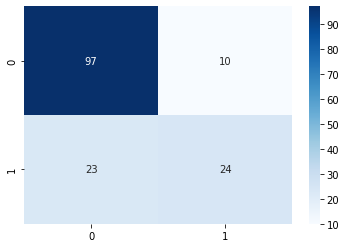

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X[sel_cols_fc],
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=0)
# fclassif performs better in this case
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.show()


In [79]:
from sklearn.decomposition import PCA
from utils.visualize import plot_classification

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       107
           1       0.65      0.51      0.57        47

    accuracy                           0.77       154
   macro avg       0.73      0.69      0.71       154
weighted avg       0.76      0.77      0.76       154



<module 'matplotlib.pyplot' from 'c:\\Users\\ZAID\\miniconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

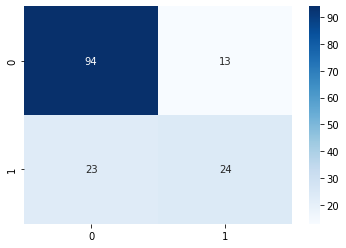

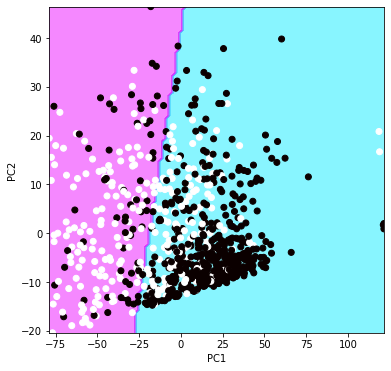

In [81]:
pca = PCA(n_components=2)
Xp = pca.fit_transform(X[sel_cols_fc])
Xp = pd.DataFrame(Xp, columns=['PC1', 'PC2'])
X_train, X_test, y_train, y_test = train_test_split(Xp, y, 
                                                    test_size=0.2,
                                                    random_state=0)
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plot_classification(clf, Xp, y, col1="PC1", col2="PC2")